Code for analyzing SCZ phenotype
@uthor: Raju Tomer

In [ ]:
import monnet_utils as tl

In [7]:
#Import statements
import skimage.external.tifffile as tff
import os
import numpy as np
from scipy import ndimage as ndi
import scipy as spy
import skimage as sk
import skimage.filters as skf
import skimage.morphology as skm
import skimage.measure as skmes
import matplotlib.patches as mptch
import scipy.io as sio
import scipy as scpy
import glob
import networkx as nx
import time
import matplotlib.pyplot as plt
import pickle
import scipy.signal as spy_sig
import collections
import math
import re
import scipy.spatial.distance
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import kde
from scipy.stats import zscore
from scipy.ndimage import gaussian_filter1d
#from matplotlib import cm
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy import stats
# from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


import community

In [8]:
############## Function to read all the data from different folders #################
def read_init_dat():
    d_ad = {}
    d_labIm = {}
    d_fn1 = {}
    d_fn2 = {}
    d_nspIDs = {}
    d_com = {}
    d_dff1 = {}
    d_dff2 = {}
    d_f1 = {}
    d_f2 = {}
    d_nsp_dff1 = {}
    d_nsp_dff2 = {}
    
    for batch_id in ['a','b','c','d','e','f','g']:
        if (batch_id == 'a'):
            print(batch_id)
            analysis_dir = r'X:\People\Raju\Data\Batch_a'
            f_data_dir = r'Y:\People\Raju\Data\Batch_a\Segmentation'
            data_dir = r'Y:\People\Raju\Data\Batch_a\Aligned'
        elif (batch_id == 'b'):
            print(batch_id)
            analysis_dir = r'X:\People\Raju\Data\Batch_b'
            f_data_dir = r'Y:\People\Raju\Data\Batch_b\Segmentation'
            data_dir = r'Y:\People\Raju\Data\Batch_b\Aligned'
        elif (batch_id == 'c'):
            print(batch_id)
            analysis_dir = r'X:\People\Raju\Data\Batch_c'
            f_data_dir = r'Y:\People\Raju\Data\Batch_c\Segmentation'
            data_dir = r'Y:\People\Raju\Data\Batch_c\Aligned'
        elif (batch_id == 'd'):
            print(batch_id)
            analysis_dir = r'X:\People\Raju\Data\Batch_d'
            f_data_dir = r'Y:\People\Raju\Data\Batch_d\Segmentation'
            data_dir = r'Y:\People\Raju\Data\Batch_d\Aligned'
        elif (batch_id == 'e'):
            print(batch_id)
            analysis_dir = r'X:\People\Raju\Data\Batch_e'
            f_data_dir = r'Y:\People\Raju\Data\Batch_e\Segmentation'
            data_dir = r'Y:\People\Raju\Data\Batch_e\Aligned'
        elif (batch_id == 'f'):
            print(batch_id)
            analysis_dir = r'X:\People\Raju\Data\Batch_f'
            f_data_dir = r'Y:\People\Raju\Data\Batch_f\Segmentation'
            data_dir = r'Y:\People\Raju\Data\Batch_f\Aligned'
        elif (batch_id == 'g'):
            print(batch_id)
            analysis_dir = r'X:\People\Raju\Data\Batch_g'
            f_data_dir = r'Y:\People\Raju\Data\Batch_g\Segmentation'
            data_dir = r'Y:\People\Raju\Data\Batch_g\Aligned'
                
        dff_fn1 = 'dict_dff1.pickle'
        dff_fn2 = 'dict_dff2.pickle'
        f_fn1 = 'dict_f_medF1.pickle'
        f_fn2 = 'dict_f_medF2.pickle'
        
        dict_dff1 = tl.load_pickle(analysis_dir, dff_fn1)
        dict_dff2 = tl.load_pickle(analysis_dir, dff_fn2)
        dict_f1 = tl.load_pickle(analysis_dir, f_fn1)
        dict_f2 = tl.load_pickle(analysis_dir, f_fn2)
        
        dict_in_fn1 = tl.load_pickle(f_data_dir, r'dict_in_fn.pickle')
        dict_im_lab = tl.load_pickle(f_data_dir,  r'dict_im_lab.pickle')
        dict_f_Nsp = tl.load_pickle(f_data_dir,  r'dict_f_NsP.pickle')
        dict_in_fn2 = {}
        file_names = sorted(glob.glob(os.path.join(data_dir, 'MAX_*.tif')))
        for i in range(0,len(file_names)):
            dict_in_fn2[i] = file_names[i]


        dict_f_Nsp1 = tl.load_pickle(analysis_dir, 'dict_f_Nsp1')
        dict_f_Nsp2 = tl.load_pickle(analysis_dir, 'dict_f_Nsp2')
        
        file_names_nsp_ids = sorted(glob.glob(os.path.join(analysis_dir, 'nsp_ids_key*')))
        dict_nsp_ids_fn = tl.construct_fn_dict(file_names_nsp_ids, key_extr_pat=r'.*nsp_ids_key(\d*)_(.*\.tif)\..*')

        file_names_cords_A = sorted(glob.glob(os.path.join(analysis_dir, 'cords_A_key*')))
        dict_cords_fn = tl.construct_fn_dict(file_names_cords_A, key_extr_pat=r'.*cords_A_key(\d*).*')
        
        dict_nsp_labs = {}
        dict_com_neuron = {}
        for k,f in dict_nsp_ids_fn.items():
            dict_nsp_labs[k] = np.load(os.path.join(analysis_dir,f))
        for k,f in dict_cords_fn.items():
            dict_com_neuron[k] = np.load(os.path.join(analysis_dir,f))
        d_ad[batch_id] = analysis_dir
        d_labIm[batch_id] = dict_im_lab
        d_fn1[batch_id] = dict_in_fn1
        d_fn2[batch_id] = dict_in_fn2
        d_nspIDs[batch_id] = dict_nsp_labs
        d_com[batch_id] = dict_com_neuron
        d_dff1[batch_id] = dict_dff1
        d_dff2[batch_id] = dict_dff2
        d_f1[batch_id] = dict_dff1
        d_f2[batch_id] = dict_dff2

        dict_dff_Nsp1 = {}
        dict_dff_Nsp2 = {}
        for k in dict_f_Nsp1.keys():
            dict_dff_Nsp1[k] = tl.convert_f_to_dff_perc(dict_f_Nsp1[k], 8, win_sz=500)
            dict_dff_Nsp2[k] = tl.convert_f_to_dff_perc(dict_f_Nsp2[k], 8, win_sz=500)

        d_nsp_dff1[batch_id] = dict_dff_Nsp1
        d_nsp_dff2[batch_id] = dict_dff_Nsp2
        
    return d_ad, d_labIm, d_fn1, d_fn2, d_nspIDs, d_com, d_dff1, d_dff2, d_f1, d_f2, d_nsp_dff1, d_nsp_dff2


In [11]:
########### Read the data ###########

d_ad, d_labIm, d_fn1, d_fn2, d_nspIDs, d_com, d_dff1, d_dff2, d_f1, d_f2, d_nsp_dff1, d_nsp_dff2 = read_init_dat()

### Filter traces for any abnormally large peak (due to low number division)
if(0):
    dff_thr = 20
    for i in d_dff1.keys():
        for k in d_dff1[i].keys():
            d1 = np.copy(d_dff1[i][k])
            d1_max = np.max(d1, axis=1)
            d2 = np.copy(d_dff2[i][k])
            d2_max = np.max(d2, axis=1)
            d_m = (d1_max >= dff_thr) | (d2_max >= dff_thr)
            if(sum(d_m)>0):
                print(i,k)
                print('before: ', d1.shape, d2.shape)
                d1[d_m,:] = 0.01
                d2[d_m,:] = 0.01 
                d_dff1[i][k] = d1
                d_dff2[i][k] = d2


Reading


In [7]:
# calculate or c (fitter dF/F, s (predicted spike trains) etc with p=2, need to be done only first time
### Read        
if(0):
    d_dff1_c_p2_filt = {}
    d_dff1_s_p2_filt = {}
    d_dff1_s_zsc_p2_filt = {}

    d_dff2_c_p2_filt = {}
    d_dff2_s_p2_filt = {}
    d_dff2_s_zsc_p2_filt = {}

    for b_id in d_dff1.keys():
        print('b id:', b_id)
        td_c = {}
        td_s = {}
        td_s_zsc = {}
        for k in d_dff1[b_id].keys():
            z = d_dff1[b_id][k] + 0.001
            nsp_ids = d_nspIDs[b_id][k]
            z = z[nsp_ids>0,:]
            k1, td_c[k], td_s[k], td_s_zsc[k] = tl.calc_s_c_worker(k,z)
            print('dff dim: ', z.shape )
            print('s dim: ', td_s[k].shape )

        d_dff1_c_p2_filt[b_id] = td_c
        d_dff1_s_p2_filt[b_id] = td_s
        d_dff1_s_zsc_p2_filt[b_id] = td_s_zsc

        td_c = {}
        td_s = {}
        td_s_zsc = {}
        for k in d_dff2[b_id].keys():
            a = d_dff2[b_id][k] + 0.001
            nsp_ids = d_nspIDs[b_id][k]
            a = a[nsp_ids>0,:]
            k1, td_c[k], td_s[k], td_s_zsc[k] = tl.calc_s_c_worker(k,a)
        d_dff2_c_p2_filt[b_id] = td_c
        d_dff2_s_p2_filt[b_id] = td_s
        d_dff2_s_zsc_p2_filt[b_id] = td_s_zsc

if (0):
    for key in d_dff1_s_p2_filt.keys():
        tl.save_pickle(d_ad[key], 'd_dff1_m5_s_p2_filt.pickle', d_dff1_s_p2_filt[key])
        tl.save_pickle(d_ad[key], 'd_dff2_m5_s_p2_filt.pickle', d_dff2_s_p2_filt[key])

        tl.save_pickle(d_ad[key], 'd_dff1_m5_s_zsc_p2_filt.pickle', d_dff1_s_zsc_p2_filt[key])
        tl.save_pickle(d_ad[key], 'd_dff2_m5_s_zsc_p2_filt.pickle', d_dff2_s_zsc_p2_filt[key])

        tl.save_pickle(d_ad[key], 'd_dff1_m5_c_p2_filt.pickle', d_dff1_c_p2_filt[key])
        tl.save_pickle(d_ad[key], 'd_dff2_m5_c_p2_filt.pickle', d_dff2_c_p2_filt[key])


        
if (1):
    print('Reading')
    d_dff1_s_p2_filt = {}
    d_dff2_s_p2_filt = {}
    d_dff1_c_p2_filt = {}
    d_dff2_c_p2_filt = {}
    d_dff1_s_zsc_p2_filt = {}
    d_dff2_s_zsc_p2_filt = {}
    for key in ['a','atwo','b','c','d','e','f','g']:
        if (key in ['ht', 'ho']):
            d_dff1_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff1_m15_s_p2_filt.pickle')
            d_dff2_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff2_m15_s_p2_filt.pickle')
            d_dff1_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff1_m15_c_p2_filt.pickle')
            d_dff2_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff2_m15_c_p2_filt.pickle')
            d_dff1_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff1_m15_s_zsc_p2_filt.pickle')
            d_dff2_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff2_m15_s_zsc_p2_filt.pickle')
        else:
            d_dff1_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff1_s_p2_filt_.pickle')
            d_dff2_s_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff2_s_p2_filt_.pickle')
            d_dff1_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff1_c_p2_filt_.pickle')
            d_dff2_c_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff2_c_p2_filt_.pickle')
            d_dff1_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff1_s_zsc_p2_filt_.pickle')
            d_dff2_s_zsc_p2_filt[key] = tl.load_pickle(d_ad[key], 'd_dff2_s_zsc_p2_filt_.pickle')


In [21]:
########  CODE for plotting dff values
if (0):
    begin_tp = 0 ### beginning time points to skip
    end_tp = -1  ### -1 till end
    # dff_cut = 0.01
    norm_corr = False
    fig_dir = r'W:\People\Raju\NNet_Paper\Figures\Fig_dat'
    save_fig = False
    fps=30
    dff_th = 0.01

    divs_o_p3 = ['o6_30', 'o9_30', 'o3_33', 'o6_33']

    for k1 in divs_o_p3:
        print('########',k1)
        sub_dir = fig_dir
        for k in d_keys[k1]:
            if (1):
                ind = re.split(r'(\d+)', k)
                i1 = ind[0]
                i2 = int(ind[1])
                # print('########################### Key ', str(k), i1, i2, ' #########################')        
                fn1 = d_fn1[i1][i2]
                fn2 = d_fn2[i1][i2]
                print(fn2)
                nsp_ids = d_nspIDs[i1][i2]
                nsp_ids_filt = nsp_ids[nsp_ids>0]

                dat1 = np.copy(d_dff1[i1][i2])
                dat1 = dat1[nsp_ids>0,:]
                dat2 = np.copy(d_dff2[i1][i2])
                dat2 = dat2[nsp_ids>0,:]
                dat1 = dat1 - dff_th
                dat1[dat1<0] = 0
                dat2 = dat2 - dff_th
                dat2[dat2<0] = 0

                post_str = 'k' + str(k) + '_' + os.path.basename(fn2) + '.png'
            ####### plot dff
                if (1):
                    sz_per_neuron = .05
                    gr_ht = np.maximum(1,int(dat1.shape[0]*sz_per_neuron))
                    fig, ax = plt.subplots(1, 2, figsize=(12,gr_ht), sharey=True) 
                    n_start = 240
                    n_stop = 265
                    tl.draw_activity_comp(dat1, ax[0], nsp_ids_filt, max_zsc_int, 
                                                     begin_tp = begin_tp, end_tp=end_tp, dff_bar=1,
                                                   fps=30, lw=.3)
                    tl.draw_activity_comp(dat2, ax[1], nsp_ids_filt, max_zsc_int, 
                                                     begin_tp = begin_tp, end_tp=end_tp, dff_bar=1,
                                                   fps=30, lw=.3)
            #         tl.draw_activity_comp(dat2, ax2, nsp_ids_filt, max_zsc_int, 
            #                                          begin_tp = begin_tp, end_tp=end_tp, dff_bar=1, fps=30)
                    plt.tight_layout()
                    plt.show()

                    if (save_fig):
                        fig_fn = os.path.join(fig_dir,'dff_full_k' + str(k) + '_' + str(n_start) + '_' + str(n_stop) + '.png')
                        print(fig_fn)
                        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            
                        fig_fn = os.path.join(fig_dir,'dff_full_k' + str(k) + '_' + str(n_start) + '_' + str(n_stop) + '.eps')
                        print(fig_fn)
                        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            


In [35]:
def run_fwhm_rise_tm_DT(d_s_zsc, d_nsp, d_c, zsc_th=3, perc=0.25):
    d_rise_tm = {}
    d_rise_tm_pos = {}
    d_fwhm = {}
    d_fwhm_pos_back = {}
    d_fwhm_pos_fwd = {}
    d_no_spk_in_fwhm = {}
    for b_id in d_s_zsc.keys():
        d_fwhm_pos_back_ = {}
        d_fwhm_pos_fwd_ = {}
        d_rise_tm_ = {}
        d_rise_tm_pos_ = {}
        d_fwhm_ = {}
        d_no_spk_in_fwhm_ = {}
        for k in d_s_zsc[b_id].keys():
            print(k)
            s_zsc = d_s_zsc[b_id][k]
            nsp_ids = d_nsp[b_id][k]
            c = np.copy(d_c[b_id][k])
            print(c.shape[0], nsp_ids.shape)
            if (c.shape[0] == len(nsp_ids)):
                print('Filtering', c.shape[0], len(nsp_ids))
                c1 = np.copy(c[nsp_ids>0,:])
                print('Filtered', c1.shape[0], len(nsp_ids))
#                 print(c.shape[0], len(nsp_ids))
#             s_zsc = s_zsc[nsp_ids>0,:]
            d_rise_tm_[k], d_rise_tm_pos_[k] = tl.calc_rise_tm(c1, s_zsc, zsc_th=zsc_th)
            d_fwhm_pos_back_[k], d_fwhm_pos_fwd_[k], d_fwhm_[k], d_no_spk_in_fwhm_[k] = tl.calc_fwhm_spikes(c1, s_zsc, zsc_th=zsc_th, perc=perc)
#             print(d_fwhm_[k])
        d_fwhm_pos_back[b_id] = d_fwhm_pos_back_
        d_fwhm_pos_fwd[b_id] = d_fwhm_pos_fwd_
        d_rise_tm[b_id] = d_rise_tm_
        d_rise_tm_pos[b_id] = d_rise_tm_pos_
        d_fwhm[b_id] = d_fwhm_
        d_no_spk_in_fwhm[b_id] = d_no_spk_in_fwhm_
    return d_rise_tm, d_rise_tm_pos, d_fwhm_pos_back, d_fwhm_pos_fwd, d_fwhm, d_no_spk_in_fwhm
    
if(1):    
    d_rise_tm_1, d_rise_tm_pos_1, d_fwhm_pos_back_1, d_fwhm_pos_fwd_1, d_fwhm_1, d_no_spk_in_fwhm_1 = run_fwhm_rise_tm_DT(
        d_dff1_s_zsc_p2_filt.copy(), d_nspIDs.copy(), d_dff1.copy(), zsc_th=5, perc=0.75)
    d_rise_tm_2, d_rise_tm_pos_2, d_fwhm_pos_back_2, d_fwhm_pos_fwd_2, d_fwhm_2, d_no_spk_in_fwhm_2 = run_fwhm_rise_tm_DT(
        d_dff2_s_zsc_p2_filt.copy(), d_nspIDs.copy(), d_dff2.copy(), zsc_th=5, perc=0.75)


0
1272 (1272,)
Filtering 1272 1272
Filtered 391 1272
1
1029 (1029,)
Filtering 1029 1029
Filtered 282 1029
2
1138 (1138,)
Filtering 1138 1138
Filtered 334 1138
3
396 (396,)
Filtering 396 396
Filtered 95 396
4
970 (970,)
Filtering 970 970
Filtered 300 970
5
861 (861,)
Filtering 861 861
Filtered 184 861
6
965 (965,)
Filtering 965 965
Filtered 266 965
7
803 (803,)
Filtering 803 803
Filtered 256 803
8
1161 (1161,)
Filtering 1161 1161
Filtered 445 1161
9
915 (915,)
Filtering 915 915
Filtered 330 915
10
526 (526,)
Filtering 526 526
Filtered 105 526
11
1075 (1075,)
Filtering 1075 1075
Filtered 414 1075
12
726 (726,)
Filtering 726 726
Filtered 192 726
13
1345 (1345,)
Filtering 1345 1345
Filtered 523 1345
14
754 (754,)
Filtering 754 754
Filtered 259 754
15
952 (952,)
Filtering 952 952
Filtered 240 952
16
722 (722,)
Filtering 722 722
Filtered 93 722
17
610 (610,)
Filtering 610 610
Filtered 54 610
18
521 (521,)
Filtering 521 521
Filtered 171 521
0
1440 (1440,)
Filtering 1440 1440
Filtered 649 1440

In [ ]:
############## Full set ################
if(1):
    d_keys = {}    
    
    d_keys['ct_33'] = ['f0', 'f1']
    d_keys['ct_34'] = ['g3', 'g4']
    d_keys['ct_35'] = ['c0', 'c1', 'c6', 'c7']
    d_keys['o3_33'] = ['f2']
    d_keys['o6_33'] = ['f3', 'f4']
    d_keys['o9_35'] = ['c4', 'c5', 'c8']
    d_keys['t6_35'] = ['c2', 'c3', 'c13', 'c14']
    d_keys['wt_33'] = ['f10', 'f11']
    d_keys['wt_35'] = ['c11', 'c12']

    divs_wt_p3 = ['wt_33', 'wt_35']
    divs_ct_p3 = ['ct_33', 'ct_34', 'ct_35']
    divs_o_p3 = ['o6_33', 'o9_35']
    divs_t_p3 = ['t6_35']
    
            


In [ ]:
#Delauney triangulation
if(0):
    d_del_gr1 = {}
    d_del_gr2 = {}
    d_del_pwc1 = {}
    d_del_pwc2 = {}
    for k1 in d_nsp_dff1.keys():
        print('########',k1)
        d_del_gr1_ = {}
        d_del_gr2_ = {}
        d_del_pwc1_ = {}
        d_del_pwc2_ = {}
        for k in d_nsp_dff1[k1].keys():
            im_lab = np.copy(d_labIm[k1][k])
            fn2 = d_fn2[k1][k]
            print(os.path.basename(fn2))
            print(k1,k)
            if (im_lab.max()>3):
                dat1 = np.copy(d_nsp_dff1[k1][k])
                dat1 = np.nan_to_num(dat1)
                g, cord, c_avg = tl.gen_del_graph(dat1, im_lab)
                print(c_avg)
                d_del_gr1_[k] = g
                dat2 = np.copy(d_nsp_dff2[k1][k])
                dat2 = np.nan_to_num(dat2)
                g, cord, c_avg = tl.gen_del_graph(dat2, im_lab)
                print(c_avg,"\n\n")
                d_del_gr2_[k] = g
            else:
                print('less than 4')
                d_del_gr1_[k] = np.nan
                d_del_gr2_[k] = np.nan

        d_del_gr1[k1] = d_del_gr1_
        d_del_gr2[k1] = d_del_gr2_
        d_del_pwc1[k1] = d_del_pwc1_
        d_del_pwc2[k1] = d_del_pwc2_

In [39]:
def loc_pca(dat, dim=0, vcut=0.95):
    pca = PCA()
    pca.fit(np.copy(dat))
    var_r = pca.explained_variance_ratio_
    cumsum_var_r = np.cumsum(var_r)
    dim = sum(cumsum_var_r <= vcut)
    var_e = var_r[dim]
    return dim, var_e

In [ ]:
def local_frpm(s_zsc, zsc_th=3):
    e = s_zsc >= zsc_th
    s_zsc_ = np.copy(s_zsc)
    s_zsc_[e] = 1
    s_zsc_[~e] = 0
    s_sum = np.sum(s_zsc_, axis=1)
    s_sum = s_sum*30*60/s_zsc_.shape[1]
    avg_frpm = np.sum(s_sum)/s_zsc_.shape[0]
    return avg_frpm

### Calculate mean correlation
if(0):
    s_zsc_th = 5
    # do_gauss_smooth = True
    # gauss_ker = 11
    dat = []
    for k1 in d_keys.keys():
        print('########',k1)
        for k in d_keys[k1]:
            ind = re.split(r'(\d+)', k)
            print(k)
            i1 = ind[0]
            i2 = int(ind[1])

            a = os.path.basename(d_fn2[i1][i2])
            m = re.search('DIV\d+', a)
            if (m):
                div = m.group(0)
                div = int(div.replace('DIV', ''))
            else:
                div = np.nan
            print('DIV: ', div)
            nsp_ids = d_nspIDs[i1][i2]
            nsp_ids_filt = nsp_ids[nsp_ids>0]

    #         dat1 = np.nan_to_num(dat1)
    #         dat2 = np.nan_to_num(dat2)
    #         dat1 = dat1 - s_zsc_th
    #         dat1[dat1<0] = 0
    #         dat2 = dat2 - s_zsc_th
    #         dat2[dat2<0] = 0

            dat1 = np.copy(d_dff1[i1][i2][nsp_ids>0,:])
            dat2 = np.copy(d_dff2[i1][i2][nsp_ids>0,:])
    #         if (do_gauss_smooth):
    #             dat1 = ndi.gaussian_filter1d(dat1,gauss_ker,axis=1)
    #             dat2 = ndi.gaussian_filter1d(dat2,gauss_ker,axis=1)

            ### Correlation change r_diff etc, r_del
            r1 = np.corrcoef(dat1)
            r2 = np.corrcoef(dat2)
            r1 = np.nan_to_num(r1)
            r2 = np.nan_to_num(r2)

            np.fill_diagonal(r1,0)        
            np.fill_diagonal(r2,0)        
            r_diff = r2 - r1

            r1_intra, r1_inter = tl.extract_intra_inter_nsp_neurons(r1, nsp_ids_filt)
            r2_intra, r2_inter = tl.extract_intra_inter_nsp_neurons(r2, nsp_ids_filt)
            r_diff_intra, r_diff_inter = tl.extract_intra_inter_nsp_neurons(r_diff, nsp_ids_filt)

            r1 = r1[np.triu_indices(r1.shape[0], k = 1)]
            r2 = r2[np.triu_indices(r2.shape[0], k = 1)]
            r_diff = r_diff[np.triu_indices(r_diff.shape[0], k = 1)]

            sl_inter, t, rsq_inter, pv_inter, err_inter = stats.linregress(r1_inter,r2_inter)
            sl_intra, t, rsq_intra, pv_intra, err_intra = stats.linregress(r1_intra,r2_intra)
            sl, t, rsq, pv, err = stats.linregress(r1, r2)

            rsq = rsq**2
            rsq_inter = rsq_inter**2
            rsq_intra = rsq_intra**2

            # Global and Local Eff
            c1 = np.corrcoef(dat1)
            c2 = np.corrcoef(dat2)
            c1 = np.nan_to_num(c1)
            c2 = np.nan_to_num(c2)        
            np.fill_diagonal(c1,0)        
            np.fill_diagonal(c2,0)

            index = list(range(1,dat1.shape[0]+1))

            g1_05=nx.Graph()
            g2_05=nx.Graph()
            g1_08=nx.Graph()
            g2_08=nx.Graph()

            for i in range(len(index)):
                g1_05.add_node(index[i])
                g2_05.add_node(index[i])
                g1_08.add_node(index[i])
                g2_08.add_node(index[i])

            for i in range(len(index)):
                for j in range(i+1, len(index)):
                    if (c1[i,j] >= 0.5):
                        g1_05.add_edge(index[i],index[j])
                    if (c2[i,j] >= 0.5):
                        g2_05.add_edge(index[i],index[j])
                    if (c1[i,j] >= 0.8):
                        g1_08.add_edge(index[i],index[j])
                    if (c2[i,j] >= 0.8):
                        g2_08.add_edge(index[i],index[j])


            geff1_05 = nx.global_efficiency(g1_05)
            geff2_05 = nx.global_efficiency(g2_05)
            geff1_08 = nx.global_efficiency(g1_08)
            geff2_08 = nx.global_efficiency(g2_08)

            ccut = 0.5
            g_wt1=nx.Graph()
            g_wt2=nx.Graph()
            for i in range(len(index)):
                g_wt1.add_node(index[i])
                g_wt2.add_node(index[i])
            for i in range(len(index)):
                for j in range(i+1, len(index)):
                    if (c1[i,j] > ccut):
                        g_wt1.add_edge(index[i],index[j],weight=c1[i,j])
                    if (c2[i,j] > ccut):
                        g_wt2.add_edge(index[i],index[j],weight=c2[i,j])

            clusters = community.best_partition(g_wt1)
            size1 = float(len(set(clusters.values())))
            clusters = community.best_partition(g_wt2)
            size2 = float(len(set(clusters.values())))


    #         leff1_05 = nx.local_efficiency(g1_05)
    #         leff2_05 = nx.local_efficiency(g2_05)
    #         leff1_08 = nx.local_efficiency(g1_08)
    #         leff2_08 = nx.local_efficiency(g2_08)

            # PCA
            dim1, var_e1 = loc_pca(dat1, vcut=0.8)
            dim2, var_e2 = loc_pca(dat2, vcut=0.8)

            #del graph
            g1 = d_del_gr1[i1][i2]
            g2 = d_del_gr2[i1][i2]
            del_r = []
            w1 = []
            w2 = []
            for u,v in g1.edges():
                del_r.append(g2[u][v]['weight'] - g1[u][v]['weight'])
                w1.append(g1[u][v]['weight'])
                w2.append(g2[u][v]['weight'])
            w1 = np.nan_to_num(w1)
            w2 = np.nan_to_num(w2)

            sl_del, t, rsq_del, pv_del, err_del = stats.linregress(w1, w2)
            rsq_del = rsq_del**2



            dats1 = np.copy(d_dff1_s_zsc_combo_p2_filt[i1][i2])
            dats2 = np.copy(d_dff2_s_zsc_combo_p2_filt[i1][i2])
            frpm1 = local_frpm(np.copy(dats1), s_zsc_th)
            frpm2 = local_frpm(np.copy(dats2), s_zsc_th)

            fwhm1 = []
            for key in d_fwhm_1[i1][i2].keys():
                fwhm1.append(np.nanmean(d_fwhm_1[i1][i2][key]))
            fwhm1 = np.nanmean(fwhm1)

            fwhm2 = []
            for key in d_fwhm_2[i1][i2].keys():
                fwhm2.append(np.nanmean(d_fwhm_2[i1][i2][key]))
            fwhm2 = np.nanmean(fwhm2)


            dat.append({'b_id': i1, 'net_id': i2, 'DIV': div, 'c_id': k, 'pwc': r1.mean(), 'pwc_inter': r1_inter.mean(), 
                        'pwc_intra': r1_intra.mean(), 'pwc_diff': r_diff.mean(), 'pwc_diff_inter': r_diff_inter.mean(),  
                        'pwc_diff_intra': r_diff_intra.mean(),  'state':'BT', 'cat_id': np.nan,
                        'StabC_inter': np.corrcoef(r1_inter, r2_inter)[1,0], 'StabC_intra': np.corrcoef(r1_intra, r2_intra)[1,0],
                        'StabC': np.corrcoef(r1, r2)[1,0], 'pwc_del_diff': np.mean(del_r), 'GEff_05': geff1_05,
                        'GEff_05_diff': (geff2_05 - geff1_05), 'GEff_08': geff1_08, 'GEff_08_diff': (geff2_08 - geff1_08),
                        'StabC_del': np.corrcoef(w1, w2)[1,0], 'PCA_d': dim1, 'PCA_var': var_e1, 'PCA_d_diff': (dim2 - dim1),
                        'PCA_var_diff': (var_e2 - var_e1), 'sl': sl, 'sl_inter': sl_inter, 'sl_intra': sl_intra, 'pval':pv,
                        'pv_inter': pv_inter, 'pv_intra': pv_intra, 'rsq': rsq, 'rsq_inter': rsq_inter, 'rsq_intra': rsq_intra,
                        'rsq_del': rsq_del, 'err': err, 'err_intra': err_intra, 'err_inter': err_inter, 'no_mod': size1,
                        'no_mod_diff': (size2 - size1), 'frpm': frpm1, 'frpm_diff': (frpm2 - frpm1), 'fwhm_diff': (fwhm2 - fwhm1),
                        'fwhm': fwhm1})

            dat.append({'b_id': i1, 'net_id': i2, 'DIV': div, 'c_id': k, 'pwc': r1.mean(), 'pwc_inter': r2_inter.mean(), 
                        'pwc_intra': r2_intra.mean(), 'pwc_diff': r_diff.mean(), 'pwc_diff_inter': r_diff_inter.mean(),  
                        'pwc_diff_intra': r_diff_intra.mean(),  'state':'AT', 'cat_id': np.nan,
                        'StabC_inter': np.corrcoef(r1_inter, r2_inter)[1,0], 'StabC_intra': np.corrcoef(r1_intra, r2_intra)[1,0],
                        'StabC': np.corrcoef(r1, r2)[1,0], 'pwc_del_diff': np.mean(del_r), 'GEff_05': geff2_05, 
                        'GEff_05_diff': (geff2_05 - geff1_05), 'GEff_08': geff2_08, 'GEff_08_diff': (geff2_08 - geff1_08),
                        'StabC_del': np.corrcoef(w1, w2)[1,0], 'PCA_d': dim2, 'PCA_var': var_e2, 'PCA_d_diff': (dim2 - dim1),
                        'PCA_var_diff': (var_e2 - var_e1),  'sl': sl, 'sl_inter': sl_inter, 'sl_intra': sl_intra, 'pval':pv,
                        'pv_inter': pv_inter, 'pv_intra': pv_intra, 'rsq': rsq, 'rsq_inter': rsq_inter, 'rsq_intra': rsq_intra,
                        'rsq_del': rsq_del, 'err': err, 'err_intra': err_intra, 'err_inter': err_inter, 'no_mod': size2,
                        'no_mod_diff': (size2 - size1),'frpm': frpm2, 'frpm_diff': (frpm2 - frpm1), 'fwhm_diff': (fwhm2 - fwhm1), 
                        'fwhm': fwhm2})


In [12]:
fileName = r'X:\People\Raju\Analysis\df_pwc_2021-06-30.pkl'
if(0):
    print('Saving the data frame')
    df_pwc.to_pickle(fileName)
if(1):
    df_pwc = pd.read_pickle(fileName)


In [ ]:
def do_cat_assignment(df, div_list, s, d_keys, div):
    for k1 in div_list:
        print(k1)
        for k in d_keys[k1]:
#             print(k)
#             print(df[df.c_id == k])
            df.cat_id[df.c_id == k] = s
            df.DIV[df.c_id==k] = div
#             print(df[df.c_id == k])
    return df
df_sel = df_pwc.copy()


df_sel = do_cat_assignment(df_sel, divs_ct_p2, 'ct', d_keys, 28)
df_sel = do_cat_assignment(df_sel, divs_wt_p2, 'wt', d_keys, 28)
df_sel = do_cat_assignment(df_sel, divs_o_p2, 'o', d_keys, 28)
df_sel = do_cat_assignment(df_sel, divs_t_p2, 't', d_keys, 28)

df_sel = do_cat_assignment(df_sel, divs_ct_p3, 'ct', d_keys, 34)
df_sel = do_cat_assignment(df_sel, divs_wt_p3, 'wt', d_keys, 34)
df_sel = do_cat_assignment(df_sel, divs_o_p3, 'o', d_keys, 34)
df_sel = do_cat_assignment(df_sel, divs_t_p3, 't', d_keys, 34)



In [18]:
df_sel = df_sel[~df_sel.cat_id.isna()]

In [27]:
df_sel_1 = df_sel[df_sel.state=="BT"]
df_sel_2 = df_sel[df_sel.state=="AT"]

df_sel_1_1 = df_sel_1[df_sel_1['DIV'] == 28]
df_sel_1_2 = df_sel_1[df_sel_1['DIV'] > 28]
#print(order)

StabC_intra


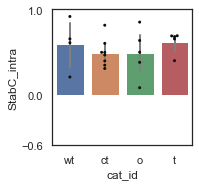

StabC_inter


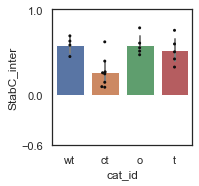

rsq_intra


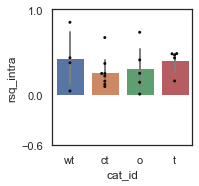

rsq_inter


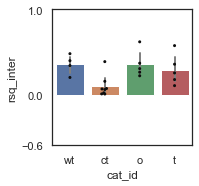

pwc_diff_intra


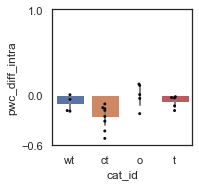

pwc_diff_inter


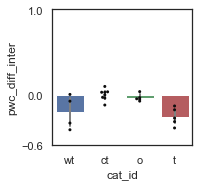

GEff_05_diff


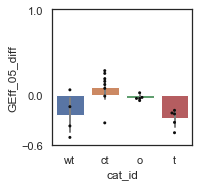

frpm_diff


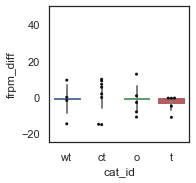

In [32]:
##come
fig_dir = r'X:\People\Raju\test01\AdaptiveCorrData\RescueFigRelated'
save_fig = False
post_str = 'barplot_dff_based'

### pwc_diff
opt = ['wt', 'ct', 'o', 't']
sns.set(style="white")

props = ['StabC_intra', 'StabC_inter', 'rsq_intra', 'rsq_inter', 'pwc_diff_intra', 
         'pwc_diff_inter', 'GEff_05_diff', 'frpm_diff']

for i in props:
    print(i)
    fig,ax = plt.subplots(figsize=(2.5,2.5))
    g = sns.barplot(x="cat_id", y=i, data=df_sel_1_2, order=opt, ax=ax, errwidth=2, errcolor='Gray')
    g = sns.swarmplot(x="cat_id", y=i, data=df_sel_1_2, color="0.05", ax=ax, order=opt, size=3.)
    if('frpm' in i):
        ax.set_ylim(-25,50)
    else:
        ax.set_ylim(-.6,1.01)
        plt.yticks((-.6,0, 1.))
        
    plt.show()

    if (save_fig):
        fig_fn = os.path.join(fig_dir, i + '_' + post_str + '.png')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            
        fig_fn = os.path.join(fig_dir,i + '_' + post_str + '.eps')
        print(fig_fn)
        fig.savefig(fig_fn, dpi=300, bbox_inches="tight")            



In [ ]:
props = ['StabC_intra', 'StabC_inter', 'rsq_intra', 'rsq_inter', 'pwc_diff_intra', 
         'pwc_diff_inter', 'GEff_05_diff', 'frpm_diff']

for prop in props:
    pvals = np.zeros((4,4))
    print(prop)
    print(opt)
    dt = df_sel_1_2.copy()
    print('\nDIV 35')
    for i in range(len(opt)):
        c = dt['cat_id'] == opt[i]
        d1 = dt[c][prop]
        y = 0
        for j in range(len(opt)):
            c = dt['cat_id'] == opt[j]
            d2 = dt[c][prop]
            t=stats.ttest_ind(d1, d2)
    #         print(opt[i], opt[j])
    #         print(t.pvalue)
            pvals[i,j] = t.pvalue
    print(pvals, '\n')
